In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from keras.models import load_model
import pickle

In [2]:
start = '2012-01-01'
stock = 'GOOG'

data = yf.download(stock, start)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...
2025-04-21,149.860001,151.059998,148.399994,150.964996,16147800
2025-04-22,153.899994,154.610001,150.869995,151.070007,15910300


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
3343,2025-04-21,149.860001,151.059998,148.399994,150.964996,16147800
3344,2025-04-22,153.899994,154.610001,150.869995,151.070007,15910300
3345,2025-04-23,157.720001,160.020004,156.350006,157.910004,18575700


In [6]:
ma_100_days = data.Close.rolling(100).mean()

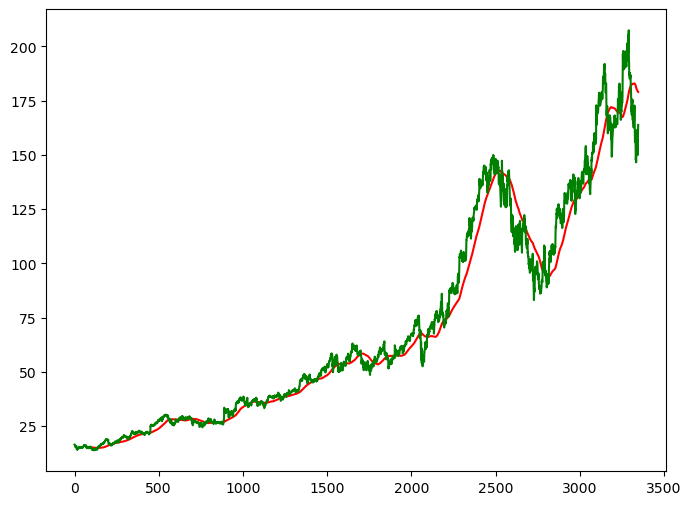

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

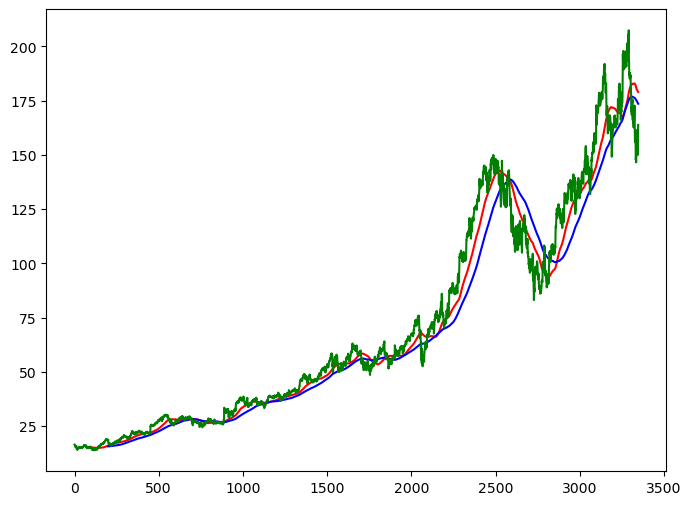

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2678

In [13]:
data_test.shape[0]

670

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
data_train_scale.shape

(2678, 1)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [18]:
x, y = np.array(x), np.array(y)

In [19]:
x.shape

(2578, 100, 1)

In [20]:
y.shape

(2578,)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 128, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.3))

model.add(LSTM(units = 64, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 32, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 32, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units =1))

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
81/81 [==============================] - 20s 161ms/step - loss: 0.0282
Epoch 2/50
81/81 [==============================] - 13s 159ms/step - loss: 0.0075
Epoch 3/50
81/81 [==============================] - 13s 159ms/step - loss: 0.0071
Epoch 4/50
81/81 [==============================] - 13s 156ms/step - loss: 0.0059
Epoch 5/50
81/81 [==============================] - 13s 158ms/step - loss: 0.0050
Epoch 6/50
81/81 [==============================] - 13s 163ms/step - loss: 0.0052
Epoch 7/50
81/81 [==============================] - 14s 169ms/step - loss: 0.0049
Epoch 8/50
81/81 [==============================] - 13s 164ms/step - loss: 0.0051
Epoch 9/50
81/81 [==============================] - 18s 218ms/step - loss: 0.0043
Epoch 10/50
81/81 [==============================] - 15s 186ms/step - loss: 0.0033
Epoch 11/50
81/81 [==============================] - 13s 164ms/step - loss: 0.0037
Epoch 12/50
81/81 [==============================] - 13s 162ms/step - loss: 0.0035
Epoch 13/50
8

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           12416     
                                                                 
 dropout_2 (Dropout)         (None, 100, 32)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8

In [30]:
model = load_model(r'C:\Users\vp190\major1\my_model.keras')
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)


In [31]:
pas_100_days = data_train.tail(100)

In [32]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [33]:
data_test_scale  =  scaler.fit_transform(data_test)

In [34]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [35]:
y_inverse=scaler.inverse_transform(y.reshape(-1, 1))

In [36]:
y_predict = model.predict(x)

21/21 [==============================] - 2s 52ms/step


In [37]:
y_predict_inverse=scaler.inverse_transform(y_predict)

In [33]:
model.save('Stock Predictions Model.keras')

In [38]:
y_predict_inverse.shape

(670, 1)

In [39]:
y_inverse.shape

(670, 1)

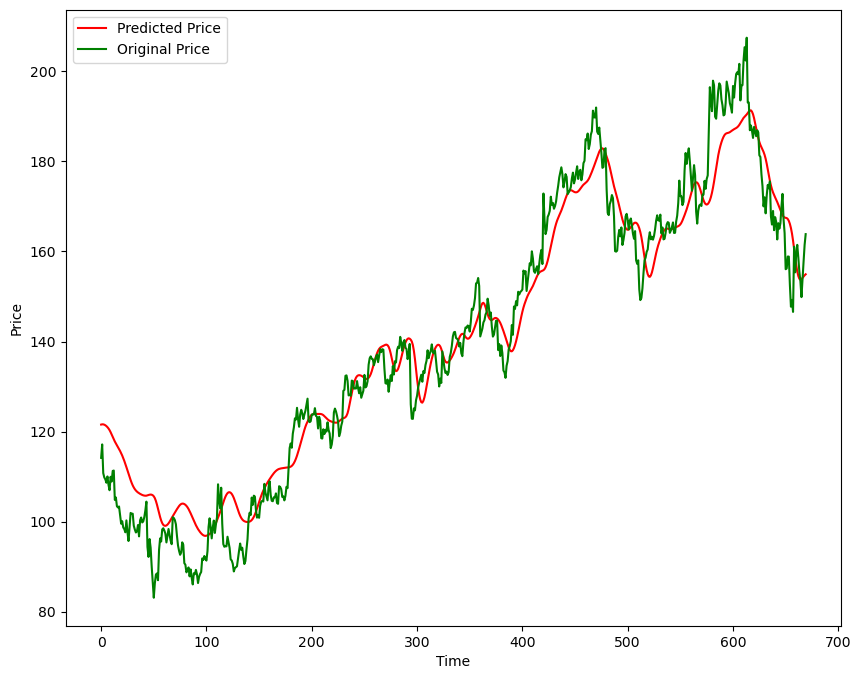

In [40]:
plt.figure(figsize=(10,8))
plt.plot(y_predict_inverse, 'r', label = 'Predicted Price')
plt.plot(y_inverse, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import r2_score

r2 = r2_score(y_inverse, y_predict_inverse)
print(f"R² Score: {r2}")

R² Score: 0.9455481548507892


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# --- 1. Calculate RMSE ---
rmse = np.sqrt(mean_squared_error(y_inverse, y_predict_inverse))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# --- 2. Calculate MSE ---
mse = mean_squared_error(y_inverse, y_predict_inverse)
print(f"Mean Squared Error (MSE): {mse}")

# --- 3. Calculate MAE ---
mae = mean_absolute_error(y_inverse, y_predict_inverse)
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 7.432521603113274
Mean Squared Error (MSE): 55.24237738074552
Mean Absolute Error (MAE): 5.910073932249155


In [43]:
def find_accuracy():

    data_test=data['Close']
    data_test_scale  =  scaler.fit_transform(data_test)

    x = []
    y = []

    for i in range(100, data_test_scale.shape[0]):
        x.append(data_test_scale[i-100:i])
        y.append(data_test_scale[i,0])

    x, y = np.array(x), np.array(y)

    y_inverse=scaler.inverse_transform(y.reshape(-1, 1))
    y_predict = model.predict(x)
    y_predict_inverse=scaler.inverse_transform(y_predict)
    plt.figure(figsize=(10,8))
    plt.plot(y_predict_inverse, 'r', label = 'Predicted Price')
    plt.plot(y_inverse, 'g', label = 'Original Price')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    r2 = r2_score(y_inverse, y_predict_inverse)
    rmse = np.sqrt(mean_squared_error(y_inverse, y_predict_inverse))
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    mse = mean_squared_error(y_inverse, y_predict_inverse)
    print(f"Mean Squared Error (MSE): {mse}")


    mae = mean_absolute_error(y_inverse, y_predict_inverse)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}")

102/102 [==============================] - 5s 51ms/step


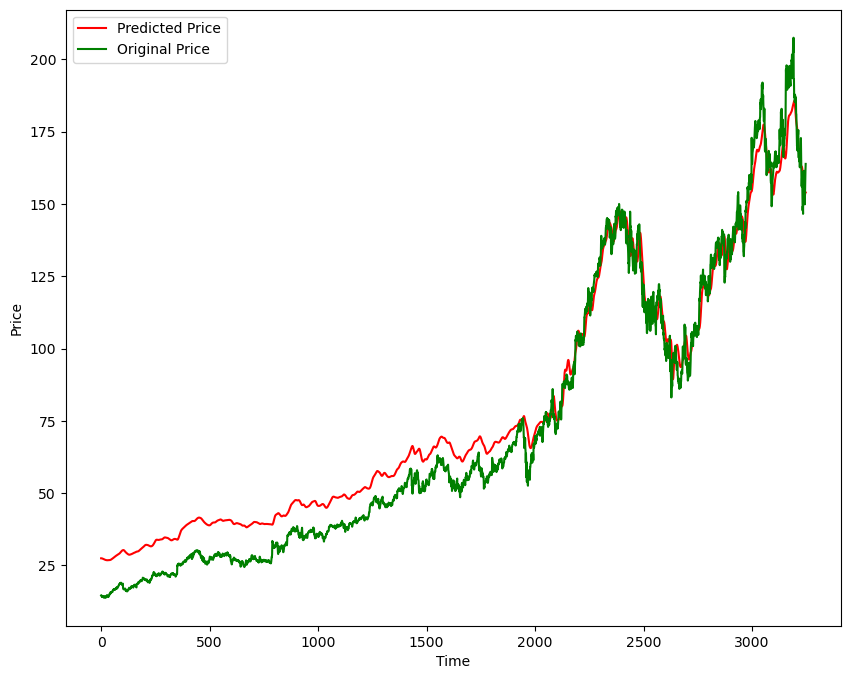

Root Mean Squared Error (RMSE): 9.171974282225811
Mean Squared Error (MSE): 84.12511223381168
Mean Absolute Error (MAE): 8.22060193598564
R² Score: 0.964479545569897


In [44]:
find_accuracy()

In [35]:
import pickle

# Example: Save a scaler
with open("model_lstm.pkl", "wb") as f:
  pickle.dump(model, f)


INFO:tensorflow:Assets written to: ram://fde40495-48e7-46a7-ac4a-7667ac2c9b15/assets


In [36]:
import keras

In [37]:
model.save("lstm_model1.h5")

In [41]:
model.save('my_model.h5')


In [42]:
model.save('my_model.keras')

In [50]:
import pickle

# Assume 'scaler' is your fitted scaler (e.g., MinMaxScaler)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)